In [1]:
import sys

sys.path.append('../')

import keras4torch as k4t
import torch
from torch import nn
from sklearn.datasets import load_iris
import numpy as np
from keras4torch.metrics import *

In [2]:
X, y = load_iris(return_X_y=True)
X = X.astype(np.float32)
y = y.astype(np.int64)

In [3]:
import pandas
import numpy
pandas.__version__, numpy.__version__

('1.1.1', '1.19.1')

In [4]:
model = nn.Sequential(
    nn.Linear(4, 128), nn.ReLU(),
    nn.Sequential(
        nn.Linear(128, 64), nn.ReLU()
    ),
    nn.Linear(64, 3)
)

model = k4t.Model(model)

In [5]:
def accuracy(y_pred, y_true):
    right_cnt = (y_pred.argmax(-1) == y_true).sum()
    return right_cnt * 1.0 / y_true.shape[0]

model.compile(optimizer='adam', loss='ce_loss', metrics=['acc'])

In [6]:
model.summary(input_shape=[4])

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 128]                 640
├─ReLU: 1-2                              [-1, 128]                 --
├─Sequential: 1-3                        [-1, 64]                  --
|    └─Linear: 2-1                       [-1, 64]                  8,256
|    └─ReLU: 2-2                         [-1, 64]                  --
├─Linear: 1-4                            [-1, 3]                   195
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04


In [7]:
history = model.fit(X, y,
            epochs=15,
            validation_split=0.2,
            )

Train on 120 samples, validate on 30 samples:
Epoch 1/15 - 0.0s - loss: 0.9631 - acc: 0.6589 - val_loss: 0.8920 - val_acc: 0.8667 - lr: 1e-03
Epoch 2/15 - 0.0s - loss: 0.8956 - acc: 0.6719 - val_loss: 0.8235 - val_acc: 0.8333 - lr: 1e-03
Epoch 3/15 - 0.0s - loss: 0.8294 - acc: 0.8021 - val_loss: 0.7993 - val_acc: 0.7000 - lr: 1e-03
Epoch 4/15 - 0.0s - loss: 0.7676 - acc: 0.7656 - val_loss: 0.7438 - val_acc: 0.7667 - lr: 1e-03
Epoch 5/15 - 0.0s - loss: 0.7100 - acc: 0.9323 - val_loss: 0.6651 - val_acc: 0.8667 - lr: 1e-03
Epoch 6/15 - 0.0s - loss: 0.6563 - acc: 0.8177 - val_loss: 0.6090 - val_acc: 0.8667 - lr: 1e-03
Epoch 7/15 - 0.0s - loss: 0.6096 - acc: 0.8958 - val_loss: 0.5935 - val_acc: 0.8667 - lr: 1e-03
Epoch 8/15 - 0.0s - loss: 0.5591 - acc: 0.9635 - val_loss: 0.5346 - val_acc: 0.9333 - lr: 1e-03
Epoch 9/15 - 0.0s - loss: 0.5136 - acc: 0.9219 - val_loss: 0.4906 - val_acc: 0.8667 - lr: 1e-03
Epoch 10/15 - 0.0s - loss: 0.4824 - acc: 0.9427 - val_loss: 0.4847 - val_acc: 0.9333 - lr:

<AxesSubplot:>

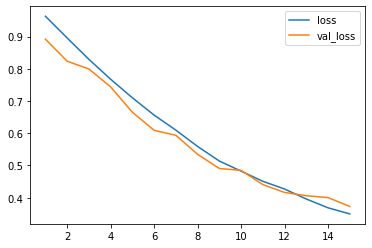

In [8]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [9]:
model.evaluate(X, y)

OrderedDict([('loss', 0.3530633), ('acc', 0.9630682)])

In [10]:
model.predict(X)

array([[ 2.3512583 , -0.8797069 , -3.0372972 ],
       [ 1.9256064 , -0.6659991 , -2.7155902 ],
       [ 2.1684372 , -0.7960448 , -2.8000114 ],
       [ 1.847085  , -0.6641699 , -2.611236  ],
       [ 2.388035  , -0.91278654, -3.044151  ],
       [ 2.3099506 , -0.9148535 , -3.1191313 ],
       [ 2.1679227 , -0.82860535, -2.7745395 ],
       [ 2.160916  , -0.789864  , -2.9020736 ],
       [ 1.7727486 , -0.62287015, -2.4943013 ],
       [ 1.9363244 , -0.66856676, -2.750854  ],
       [ 2.4481308 , -0.9203717 , -3.1898472 ],
       [ 2.0044682 , -0.74567795, -2.7762003 ],
       [ 1.955647  , -0.6666004 , -2.7137468 ],
       [ 2.1168554 , -0.7800071 , -2.677785  ],
       [ 2.8397033 , -1.1180177 , -3.5702782 ],
       [ 2.842236  , -1.1796819 , -3.5470066 ],
       [ 2.6342773 , -1.0608351 , -3.301711  ],
       [ 2.319109  , -0.87894696, -3.008596  ],
       [ 2.3164284 , -0.8757555 , -3.2129865 ],
       [ 2.4355638 , -0.9578803 , -3.096387  ],
       [ 1.9777824 , -0.71088225, -2.942